# 라이브러리 로드

In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import warnings
warnings.filterwarnings('ignore')
import random

# 노트북 안에 그래프를 그리기 위해
%matplotlib inline

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

# 데이터 로드

In [2]:
df = pd.read_excel("Churn_final.xlsx")

# CLTV 컬럼 추가
cltv_df = pd.read_excel("total.xlsx")
df['CLTV'] = cltv_df['CLTV']

df.head()

,Customer ID,Age,Number of Dependents,Membership,Satisfaction Score,Tech services,Streaming services,Combined Product,Contract,Tenure in Months,Monthly Charge,Total Revenue,Churn Value,CLTV
0,8779-QRDMV,78,0,None,2,1,1,2,Month-to-Month,1,39.65,59.65,1,5433
1,7495-OOKFY,74,1,Offer E,5,1,0,1,Month-to-Month,8,80.65,1024.10,1,5302
2,1658-BYGOY,71,3,Offer D,3,0,2,1,Month-to-Month,18,95.45,1910.88,1,3179
3,4598-XLKNJ,78,1,Offer C,3,2,2,1,Month-to-Month,25,98.50,2995.07,1,5337
4,4846-WHAFZ,80,1,Offer C,1,0,0,1,Month-to-Month,37,76.50,3102.36,1,2793


# 유저 기본 정보

## 기본 그래프

In [32]:
def user_chart_general(df):
    user_x_cols = ['Age', 'Membership', 'Satisfaction Score', 'CLTV']

    for user_x_col in user_x_cols:
        if user_x_col == "Age":
            plt.figure(figsize=(8, 6))
            plt.hist(df[user_x_col], bins=100, facecolor='#9B91D9', edgecolor='white', linewidth=0.3)
            plt.xlabel('Age')
            plt.ylabel('고객 수(명)')
            plt.show()

        elif user_x_col == 'Membership':
            membership_counts = df['Membership'].value_counts(normalize=True)
            plt.figure(figsize=(8, 6))
            plt.pie(membership_counts, labels=membership_counts.index, autopct='%1.1f%%',
                    colors=["#706CD9", "#1D17BF", "#9B91D9", "#B3ADD9", "#E6E4F2", "aliceblue"],
                   wedgeprops=dict(width=0.7))
            plt.title('멤버십 가입 비율')
            plt.axis('equal')
            plt.show()
            
        elif user_x_col == 'CLTV':
            plt.figure(figsize=(8, 6))
            plt.hist(df['CLTV'], bins=5, color='#9B91D9', edgecolor='white', rwidth=0.8)
            plt.xlabel('CLTV 구간')
            plt.ylabel('고객 수(명)')
            plt.show()

            
        else:
            plt.figure(figsize=(8, 6))
            plt.hist(df[user_x_col], bins=5, facecolor='#9B91D9', edgecolor='white', linewidth=0.3, rwidth = 0.8)
            plt.xlabel(user_x_col)
            plt.ylabel('고객 수(명)')
            plt.xticks(range(1,6))
            plt.show()


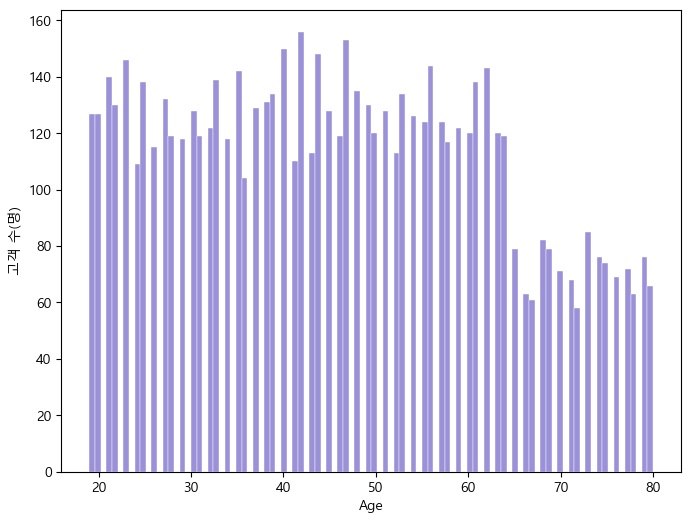

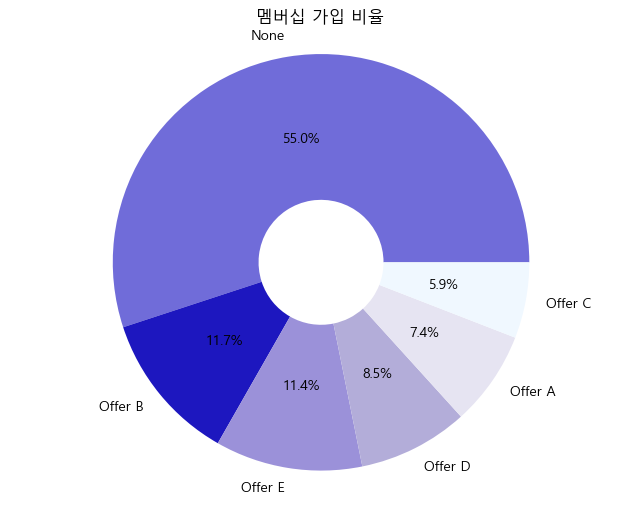

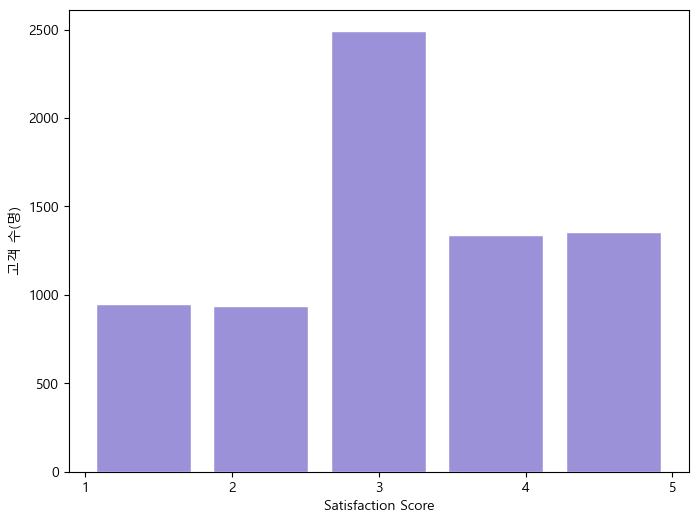

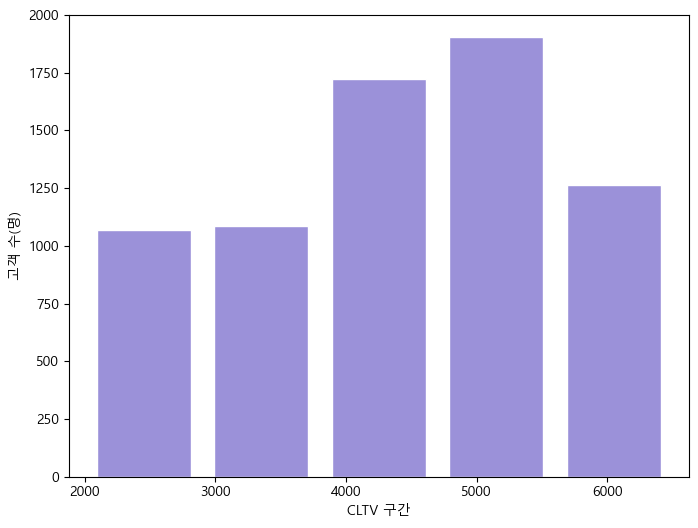

In [33]:
user_chart_general(df)

## 상관관계 그래프

In [41]:
def user_chart_correlation(df):
    user_x_cols = ['Age', 'Membership', 'Satisfaction Score', 'CLTV']

    for user_x_col in user_x_cols:
        
        if user_x_col == 'CLTV':
            # CLTV 값을 5개의 구간으로 나눕니다.
            cltv_bins = np.linspace(df['CLTV'].min(), df['CLTV'].max(), 6)  # 5개의 구간으로 나눔

            # 구간별 Churn Value 평균 계산
            churn_means = []
            for i in range(len(cltv_bins) - 1):
                lower_bound = cltv_bins[i]
                upper_bound = cltv_bins[i + 1]
                subset = df[(df['CLTV'] >= lower_bound) & (df['CLTV'] < upper_bound)]
                churn_mean = subset['Churn Value'].mean()
                churn_means.append(churn_mean)

            # Matplotlib를 사용하여 막대 그래프 그리기
            plt.figure(figsize=(8, 6))
            plt.bar(range(1, 6), churn_means, color="#9B91D9")
            plt.xlabel('CLTV 구간')
            plt.ylabel('Churn Value')
            plt.xticks(range(1, 6))
            plt.show()
        
        elif user_x_col == 'Satisfaction Score':
            plt.figure(figsize=(8, 6))
            grouped = df.groupby(user_x_col)['Churn Value'].mean().reset_index()
            sns.barplot(x=user_x_col, y='Churn Value', data=grouped, color="#9B91D9")
            plt.xlabel(user_x_col)
            plt.ylabel('Churn Value')
            plt.show()
            
        else:
            plt.figure(figsize=(8, 6))
            grouped = df.groupby(user_x_col)['Churn Value'].mean().reset_index()
            sns.barplot(x=user_x_col, y='Churn Value', data=grouped, color="#9B91D9")
            plt.xlabel(user_x_col)
            plt.ylabel('Churn Value')
            
            if user_x_col == 'Age':
                plt.xticks(range(0,70,10))
                
            plt.show()

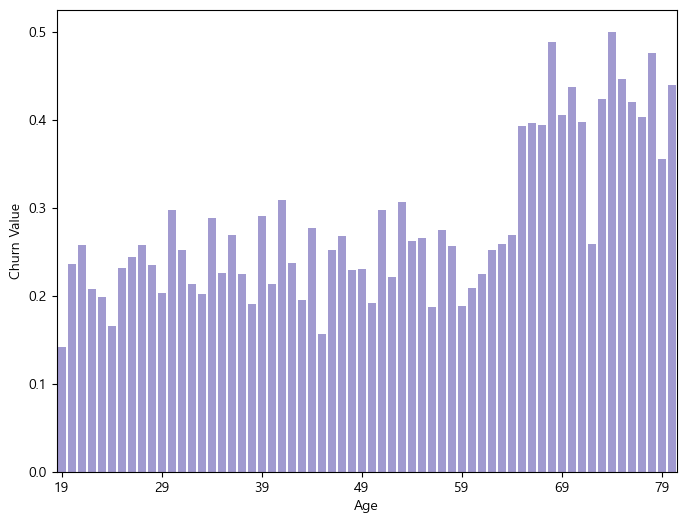

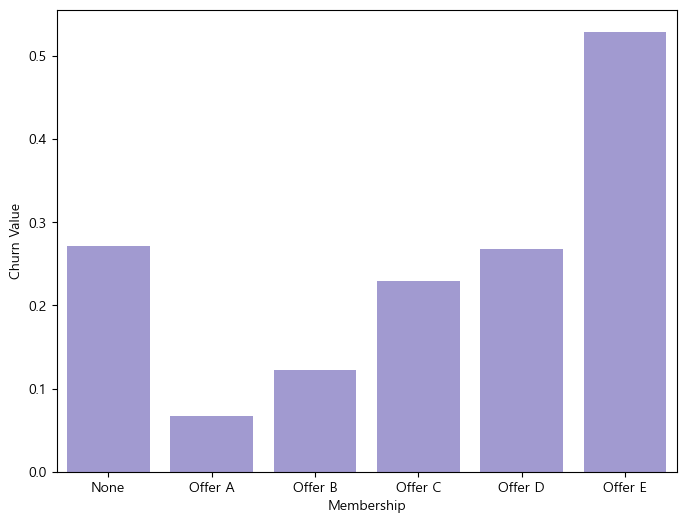

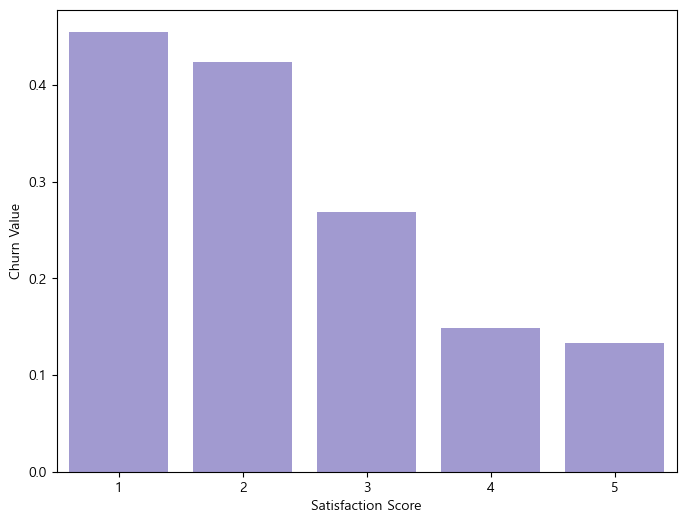

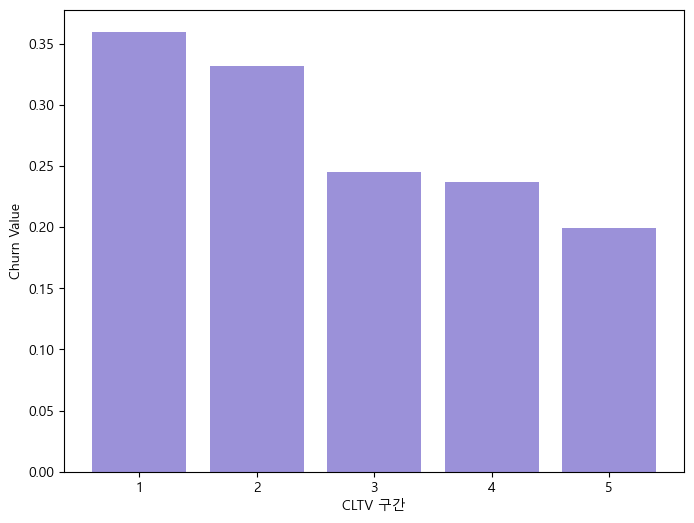

In [42]:
user_chart_correlation(df)

# 서비스 정보

## 기본 그래프

In [7]:
import matplotlib.pyplot as plt

def service_chart_general(df):
    service_x_cols = ['Tech services', 'Streaming services', 'Number of Dependents', 'Combined Product']

    for service_x_col in service_x_cols:
        plt.figure(figsize=(8, 6))
        
        counts = df[service_x_col].value_counts()
        sizes = counts.values
        colors = ["#706CD9", "#1D17BF", "#9B91D9", "#B3ADD9", "#E6E4F2"]
        
        if service_x_col == 'Number of Dependents':
            filtered_counts = counts[counts.index < 4]
            labels = [f'{label} 명' for label in filtered_counts.index]
            sizes = filtered_counts.values
            plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0, counterclock=False, colors=colors,
                   wedgeprops=dict(width=0.7))
            plt.title("가족 결합 수" if service_x_col == 'Number of Dependents' else f"{service_x_col} 이용 수")
        else:
            labels = [f'{label} 개' for label in counts.index]
            plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=0,counterclock=False, colors=colors,
                   wedgeprops=dict(width=0.7))
            plt.title(f"{service_x_col} 이용 수")
        
        plt.axis('equal')
        plt.show()


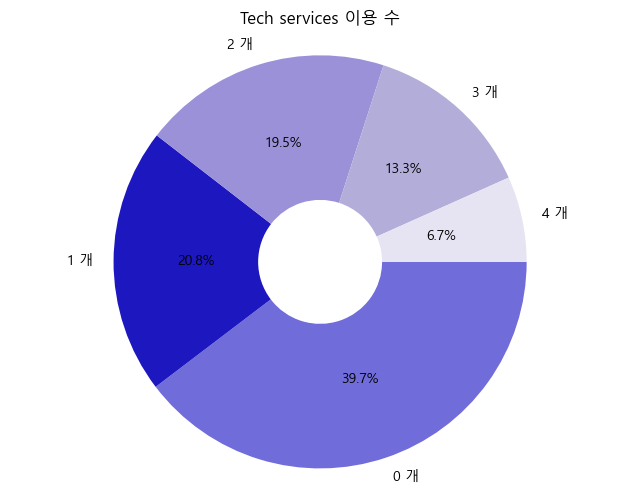

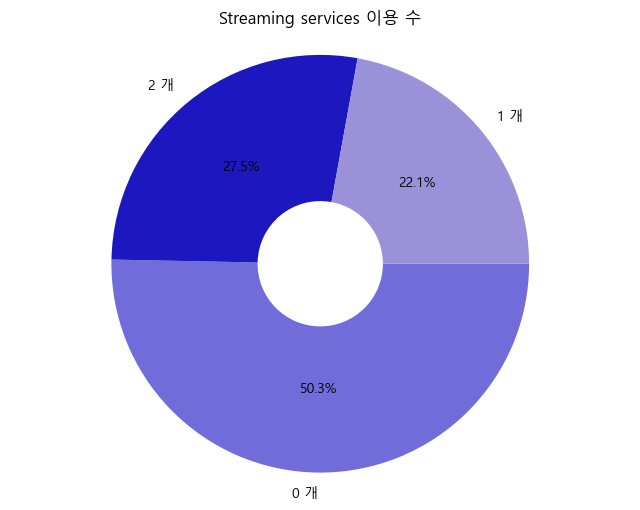

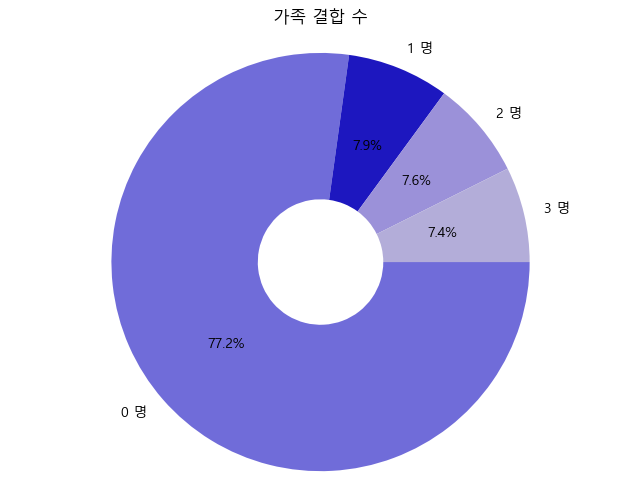

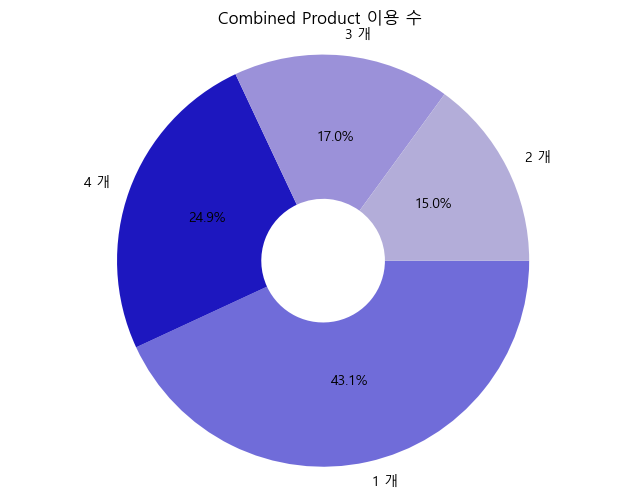

In [8]:
service_chart_general(df)

## 상관관계 그래프

In [45]:
def service_chart_correlation(df):
    service_x_cols = ['Tech services', 'Streaming services','Number of Dependents', 'Combined Product']

    for service_x_col in service_x_cols:
        
            
        plt.figure(figsize=(8, 6))
        
        grouped = df.groupby(service_x_col)['Churn Value'].mean().reset_index()
        
        # Bar 그래프 그리기
        sns.barplot(x=service_x_col, y='Churn Value', data=grouped, color="#9B91D9")
        
        # x축의 단위를 1로 설정
        plt.ylabel('Churn Value')
        
        if service_x_col == 'Number of Dependents':
            plt.xlabel("가족 결합 수")
        else:
            plt.xlabel(f"{service_x_col} 이용 수")
            
        
        
        plt.show()

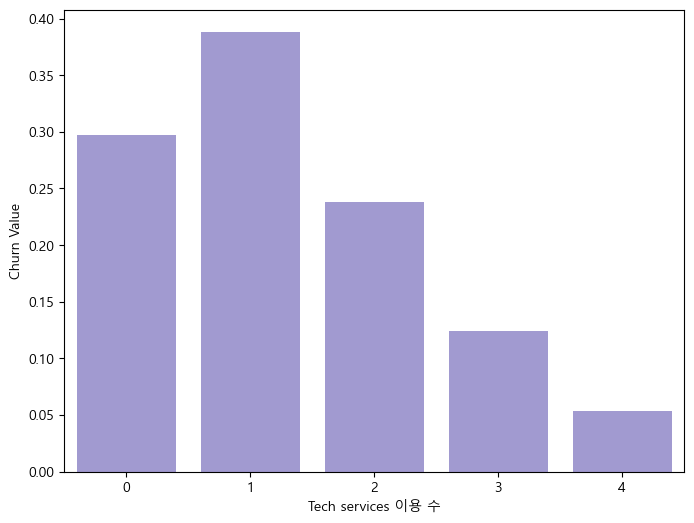

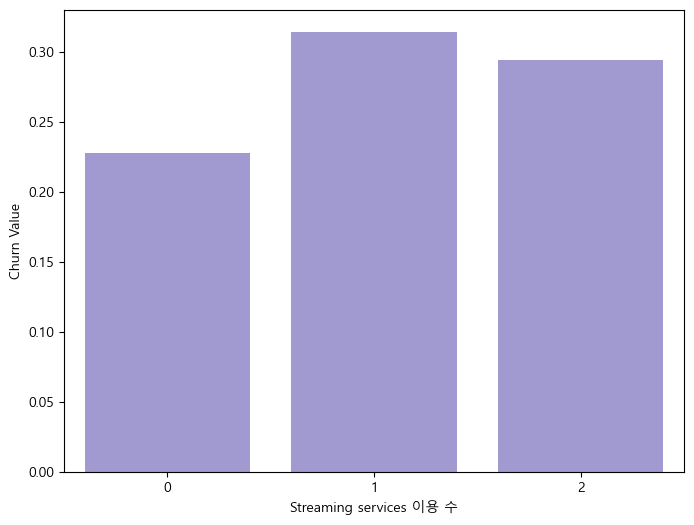

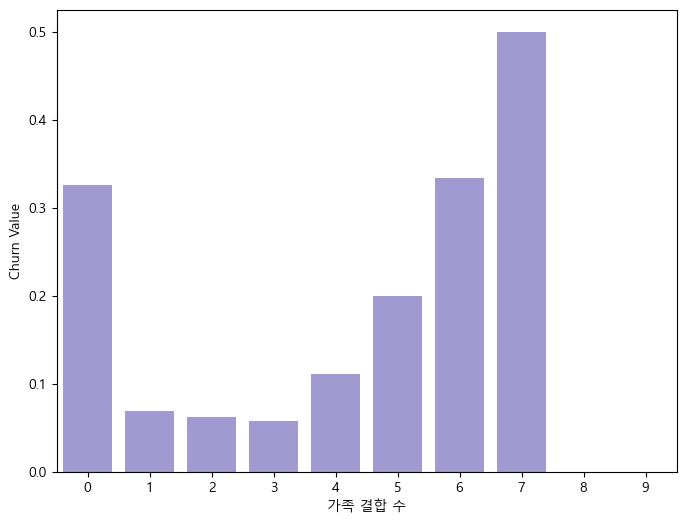

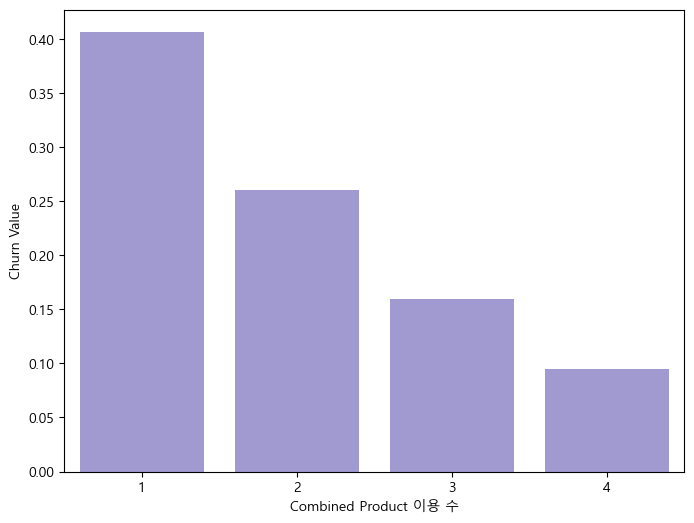

In [46]:
service_chart_correlation(df)

# 요금제 정보

## 기본 그래프

In [11]:
def bill_chart_general(df):
    bill_x_cols = ['Contract', 'Tenure in Months', 'Monthly Charge', 'Total Revenue']

    for bill_x_col in bill_x_cols:
        plt.figure(figsize=(8, 6))
        
        if bill_x_col == 'Contract':
            counts = df[bill_x_col].value_counts()
            labels = counts.index
            sizes = counts.values
            colors = ["#706CD9", "#1D17BF", "#9B91D9", "#B3ADD9", "#E6E4F2"]
            plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.7))
            plt.title("계약 형태")
        else:
            plt.hist(df[bill_x_col], bins=10, color='#9B91D9', edgecolor='none', rwidth=0.8)
            plt.xlabel(bill_x_col)
            plt.ylabel('고객 수(명)')
        
        plt.show()



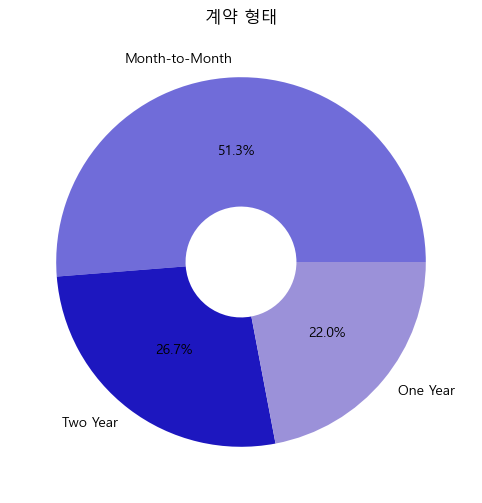

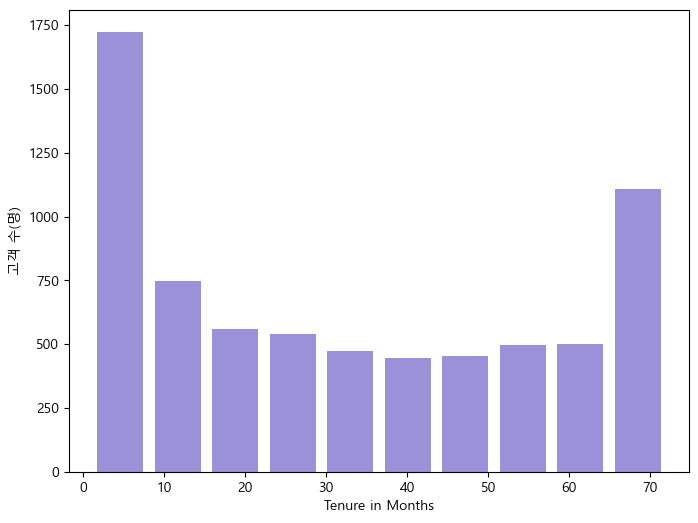

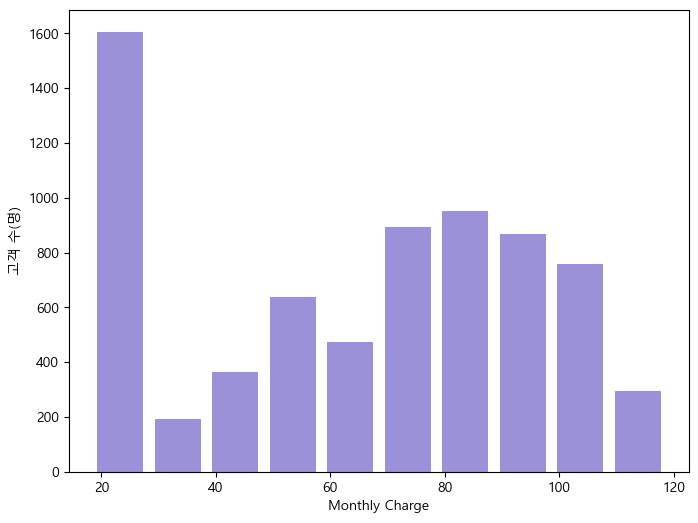

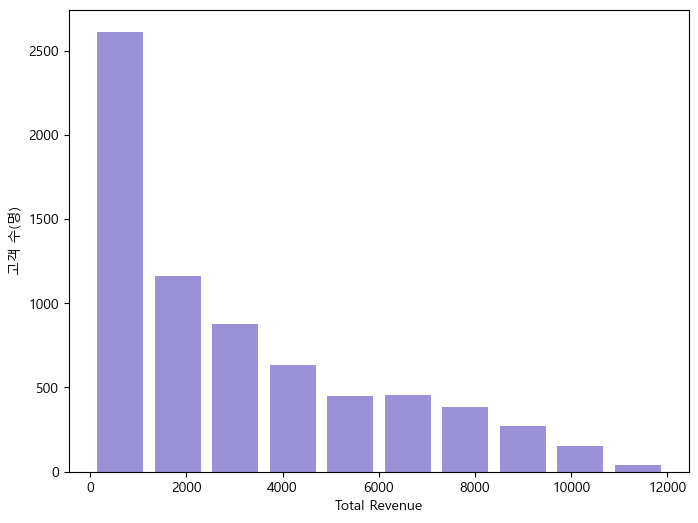

In [12]:
bill_chart_general(df)

## 상관관계 그래프

In [75]:
def bill_chart_correlation(df):
    bill_x_cols = ['Contract', 'Tenure in Months', 'Monthly Charge', 'Total Revenue']

    for bill_x_col in bill_x_cols:
        plt.figure(figsize=(8, 6))

        if bill_x_col == 'Contract' or bill_x_col == 'Tenure in Months':
            grouped = df.groupby(bill_x_col)['Churn Value'].mean().reset_index()
            sns.barplot(x=bill_x_col, y='Churn Value', data=grouped, color='#9B91D9')
            plt.xlabel(bill_x_col)
            plt.ylabel('Churn Value')

            if bill_x_col == 'Tenure in Months':
                # x축 눈금 조정
                plt.xticks(range(0, len(grouped), 10))

        elif bill_x_col == 'Monthly Charge':
            df[bill_x_col] = df[bill_x_col].astype(float)
            charge_bins = np.linspace(df[bill_x_col].min(), df[bill_x_col].max(), 6)

            churn_means = []
            for i in range(len(charge_bins) - 1):
                lower_bound = charge_bins[i]
                upper_bound = charge_bins[i + 1]
                subset = df[(df[bill_x_col] >= lower_bound) & (df[bill_x_col] < upper_bound)]
                churn_mean = subset['Churn Value'].mean()
                churn_means.append(churn_mean)

            plt.bar(range(1, 6), churn_means, color='#9B91D9')
            plt.xlabel('Monthly Charge')
            plt.ylabel('Churn Value')
            # x축 눈금 이름 설정
            plt.xticks(range(1, 6), ['0~20', '20~30', '30~40', '40~50', '50~60'])

        else:
            revenue_bins = np.linspace(df[bill_x_col].min(), df[bill_x_col].max(), 20)

            churn_means = []
            x_labels = []  # x축 눈금의 이름을 저장할 리스트

            for i in range(len(revenue_bins) - 1):
                lower_bound = revenue_bins[i]
                upper_bound = revenue_bins[i + 1]

                # 중앙값 계산
                bin_center = (lower_bound + upper_bound) / 2
                x_labels.append(f'~{int(bin_center)}')  # 눈금 이름에 중앙값 추가

                subset = df[(df[bill_x_col] >= lower_bound) & (df[bill_x_col] < upper_bound)]
                churn_mean = subset['Churn Value'].mean()
                churn_means.append(churn_mean)

            plt.figure(figsize=(8, 6))
            plt.bar(range(1, 20), churn_means, color='#9B91D9')
            plt.xlabel('Total Revenue')
            plt.ylabel('Churn Value')
            plt.xticks(range(1, 20), x_labels, rotation=45)  # x축 눈금 이름 설정

        plt.show()

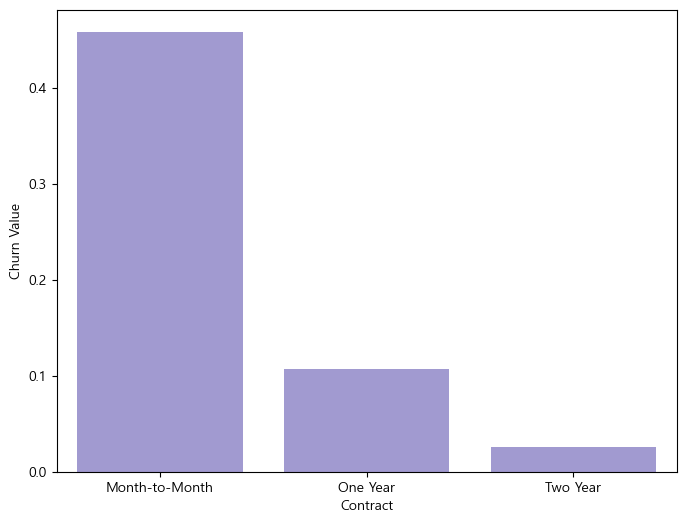

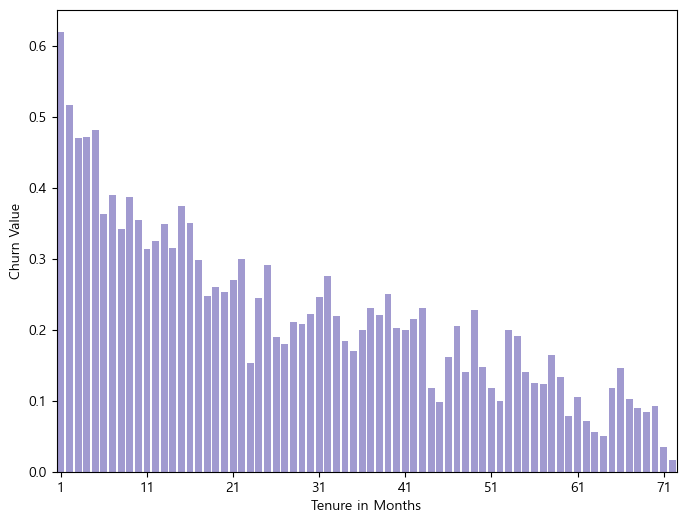

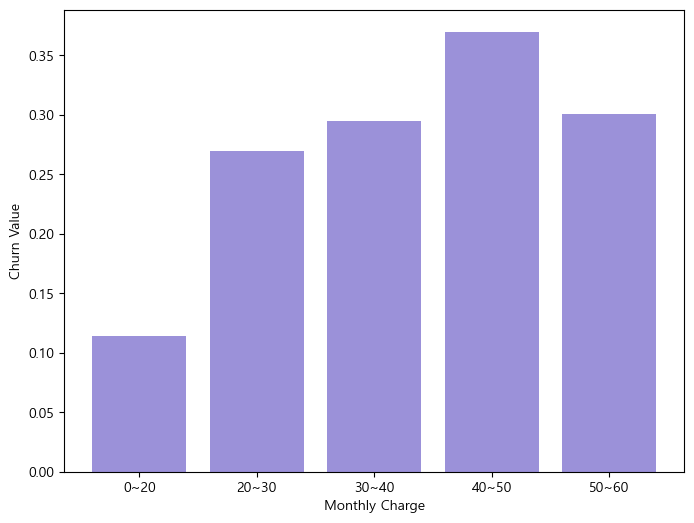

<Figure size 800x600 with 0 Axes>

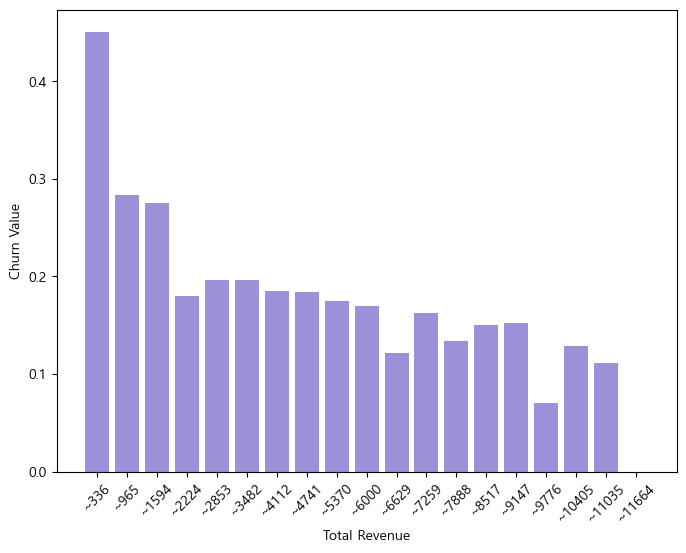

In [76]:
bill_chart_correlation(df)

In [87]:
def bill_chart_correlation(df):
    bill_x_cols = ['Contract', 'Tenure in Months', 'Monthly Charge', 'Total Revenue']

    for bill_x_col in bill_x_cols:
        plt.figure(figsize=(8, 6))

        if bill_x_col == 'Contract' or bill_x_col == 'Tenure in Months':
            grouped = df.groupby(bill_x_col)['Churn Value'].mean().reset_index()
            sns.barplot(x=bill_x_col, y='Churn Value', data=grouped, color='#9B91D9')
            plt.xlabel(bill_x_col)
            plt.ylabel('Churn Value')

            if bill_x_col == 'Tenure in Months':
                # x축 눈금 조정
                plt.xticks(range(0, len(grouped), 10))

        elif bill_x_col == 'Monthly Charge':
            df[bill_x_col] = df[bill_x_col].astype(float)
            charge_bins = np.linspace(df[bill_x_col].min(), df[bill_x_col].max(), 6)

            churn_means = []
            for i in range(len(charge_bins) - 1):
                lower_bound = charge_bins[i]
                upper_bound = charge_bins[i + 1]
                subset = df[(df[bill_x_col] >= lower_bound) & (df[bill_x_col] < upper_bound)]
                churn_mean = subset['Churn Value'].mean()
                churn_means.append(churn_mean)

            plt.bar(range(1, 6), churn_means, color='#9B91D9')
            plt.xlabel('Monthly Charge')
            plt.ylabel('Churn Value')
            # x축 눈금 이름 설정
            plt.xticks(range(1, 6), ['0~20', '20~30', '30~40', '40~50', '50~60'])

        else:
            lower_bound = 0  # 시작 구간
            upper_bound = 500  # 시작 구간

            revenue_bins = []  # 구간 경계값을 저장할 리스트

            while upper_bound <= df[bill_x_col].max():
                revenue_bins.append(upper_bound)
                upper_bound += 500

            churn_means = []
            x_labels = []  # x축 눈금의 이름을 저장할 리스트

            for i in range(len(revenue_bins)):
                if i == 0:
                    x_labels.append(f'~{revenue_bins[i]}')
                    subset = df[(df[bill_x_col] >= lower_bound) & (df[bill_x_col] <= revenue_bins[i])]
                else:
                    x_labels.append(f'~{revenue_bins[i]}')
                    subset = df[(df[bill_x_col] > revenue_bins[i-1]) & (df[bill_x_col] <= revenue_bins[i])]

                churn_mean = subset['Churn Value'].mean()
                churn_means.append(churn_mean)

            plt.figure(figsize=(8, 6))
            plt.bar(range(1, len(revenue_bins) + 1), churn_means, color='#9B91D9')
            plt.xlabel('Total Revenue')
            plt.ylabel('Churn Value')
            plt.xticks(range(1, len(revenue_bins) + 1), x_labels, rotation=45)  # x축 눈금 이름 설정



        plt.show()

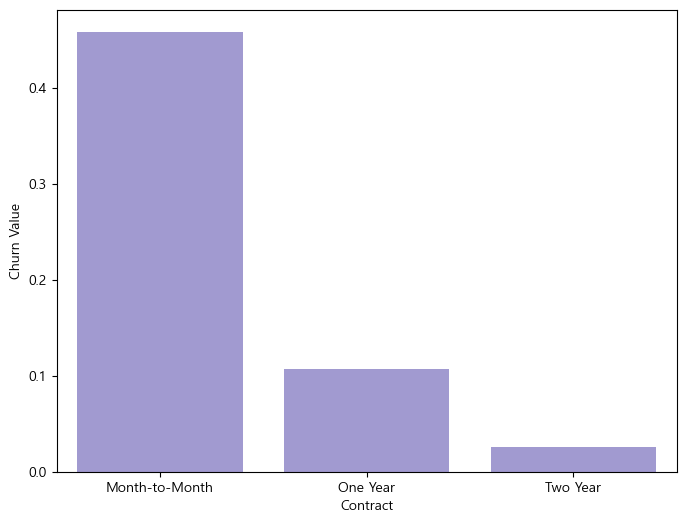

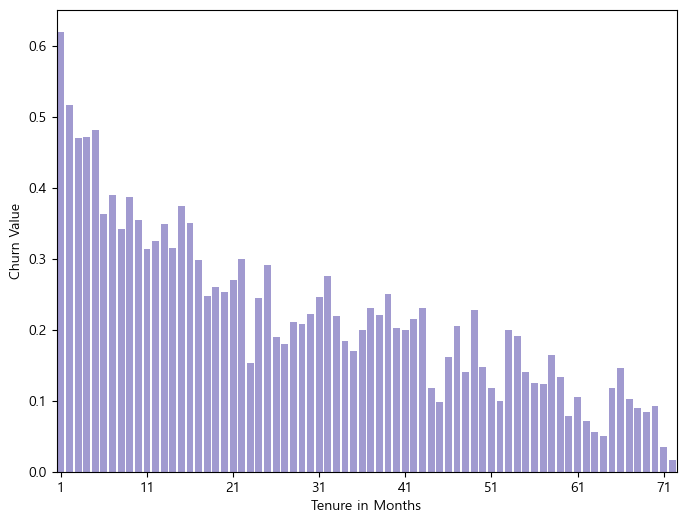

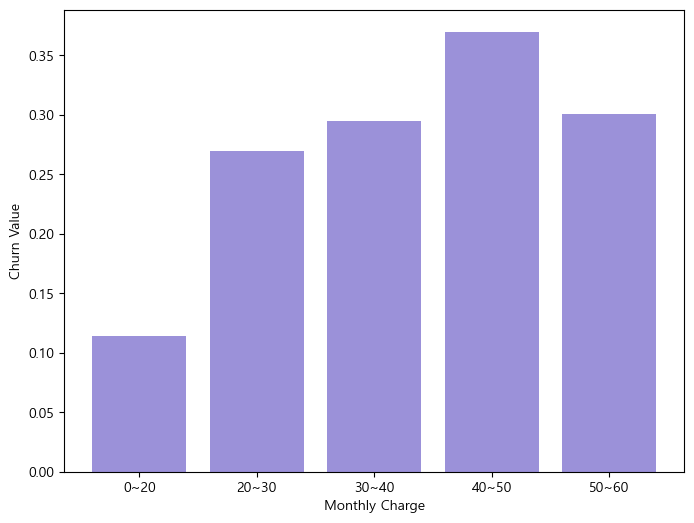

<Figure size 800x600 with 0 Axes>

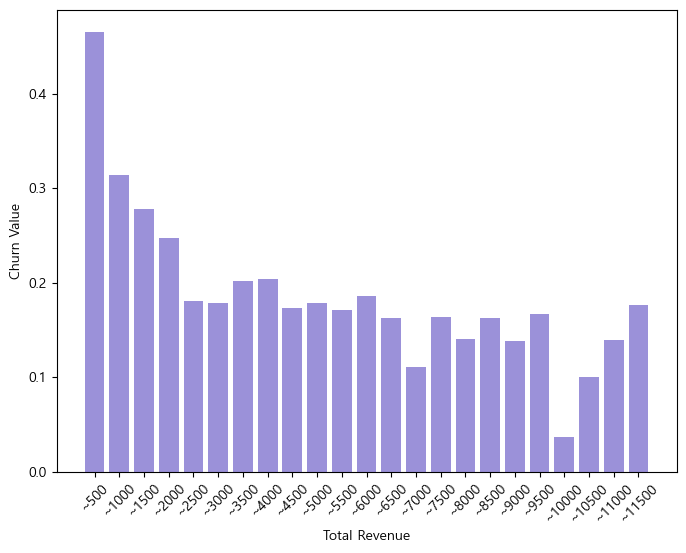

In [88]:
bill_chart_correlation(df)